In [1]:
# Import the module
import arcadia_pycolor as apc

In [2]:
# Direct access to a specific color.
# __repr__ method allows for display of the color in the terminal.
apc.aegean

   aegean #5088C5

In [3]:
# Displaying a Palette.
apc.palettes.accent

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846
   aster   #7A77AB
   rose    #F898AE

In [4]:
# Displaying a Gradient.
apc.gradients.viridis

                     
   concord #341E60 0
   grape   #5A4596 0.23
   aegean  #5088C5 0.49
   lime    #97CD78 0.77
   yellow  #FFFF00 1

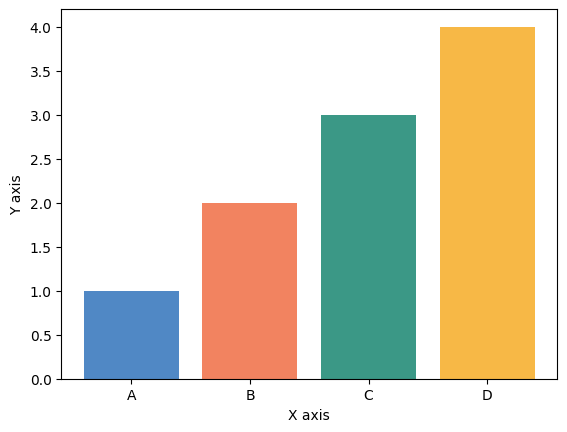

In [5]:
# Using colors in a matplotlib plot.
import matplotlib.pyplot as plt

plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=[apc.aegean, apc.amber, apc.seaweed, apc.canary],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

In [6]:
# Creating a Palette from a list of colors.
my_palette = apc.Palette("my_palette", [apc.aegean, apc.amber, apc.seaweed, apc.canary])

my_palette

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846

In [7]:
# Creating a Palette from a dictionary.
my_palette = apc.Palette.from_dict(
    "my_palette",
    {
        "red": "#FF0000",
        "green": "#00FF00",
        "blue": "#0000FF",
    },
)

my_palette

   red   #FF0000
   green #00FF00
   blue  #0000FF

In [8]:
# Creating a Gradient from a list of colors.
my_gradient = apc.Gradient("my_gradient", [apc.vitalblue, apc.oat, apc.amber])

my_gradient

                     
   vitalblue #73B5E3 0.0
   oat       #F5E4BE 0.5
   amber     #F28360 1.0

In [9]:
# Creating a Gradient from a list of colors while specifying values.
my_gradient = apc.Gradient(
    "my_gradient",
    [apc.concord, apc.vitalblue, apc.oat, apc.amber, apc.carmine],
    [0, 0.35, 0.5, 0.65, 1],
)

my_gradient

                     
   concord   #341E60 0
   vitalblue #73B5E3 0.35
   oat       #F5E4BE 0.5
   amber     #F28360 0.65
   carmine   #471122 1

In [10]:
# Creating a Gradient from a dictionary of colors.
my_gradient = apc.Gradient.from_dict(
    "my_gradient",
    {
        "red": "#FF0000",
        "grey": "#DDDDDD",
        "blue": "#0000FF",
    },
)

my_gradient

                     
   red  #FF0000 0.0
   grey #DDDDDD 0.5
   blue #0000FF 1.0

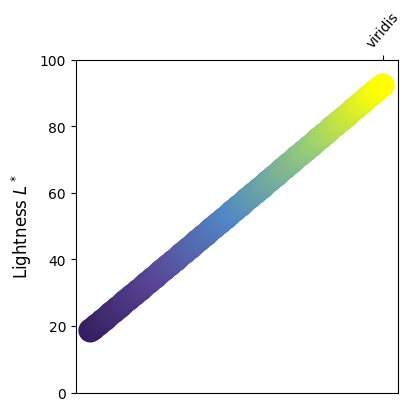

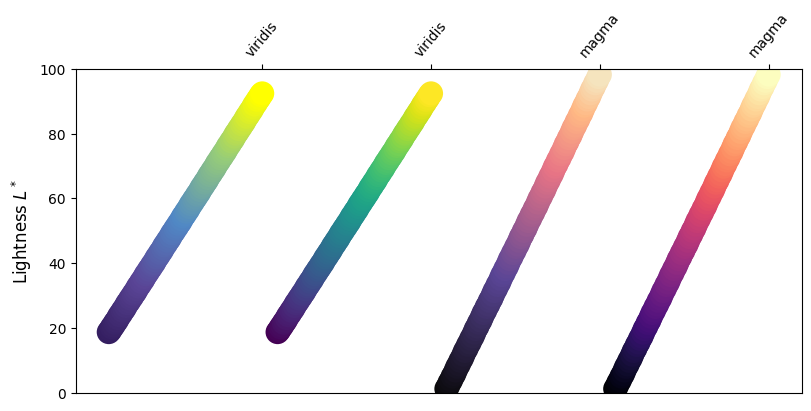

In [20]:
# Display the lightness of a Gradient.
apc.plot_gradient_lightness(apc.gradients.viridis)
apc.plot_gradient_lightness(
    [apc.gradients.viridis, "viridis", apc.gradients.magma, "magma"],
    figsize=(8, 4),
)